# Desafio 2 - Conhecendo melhor nossa base de consumidores: qual estado possui os clientes com melhores pontuações de crédito?

## Objetivo:
Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

#### Instalação de dependências

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

#### Leitura e visualização do arquivo csv do desafio

In [4]:
df = pd.read_csv('desafio1.csv')
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


#### Colunas do Data Frame

In [5]:
df.columns

Index(['RowNumber', 'id', 'sobrenome', 'pontuacao_credito',
       'estado_residencia', 'genero', 'idade', 'nivel_estabilidade',
       'saldo_conta', 'numero_produtos', 'possui_cartao_de_credito',
       'membro_ativo'],
      dtype='object')

#### Dimensão do Data Frame

In [6]:
df.shape

(7000, 12)

#### Quantos estados existem no Data Frame

In [8]:
df['estado_residencia'].nunique()

3

#### Estados presentes no Data Frame

In [17]:
df['estado_residencia'].value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

#### Verificando correlações

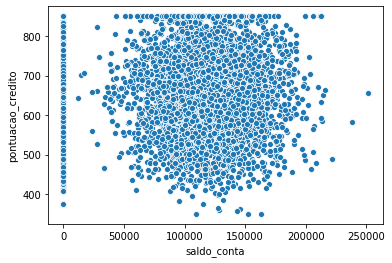

In [14]:
sns.scatterplot(x = 'saldo_conta', y = 'pontuacao_credito', data = df)

In [16]:
df[['saldo_conta', 'pontuacao_credito']].corr()

,saldo_conta,pontuacao_credito
saldo_conta,1.000000,0.009761
pontuacao_credito,0.009761,1.000000


#### Estatísticas descritivas dos dados

In [3]:
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


#### Agrupamento da pontuação crédito e os estados disponíveis
#### Foi utilizado o método .agg que permite agregar usando uma ou mais operações, depois foi renomeado as colunas para saída ser de acordo com o JSON e por último ordenado de forma crescente


In [4]:
df_estado = df.groupby('estado_residencia')['pontuacao_credito'].agg([pd.Series.mode,
                                                                      np.median,
                                                                      np.mean,
                                                                      np.std]).rename(columns = {'mode' : 'moda',
                                                                                                 'median' : 'mediana',
                                                                                                 'mean' : 'media',
                                                                                                 'std' : 'desvio_padrao'}).sort_values(by='estado_residencia', ascending=False)

#### Transposição do Data Frame

In [5]:
df_submission = df_estado.T
df_submission.head()

estado_residencia,SC,RS,PR
moda,850.000000,850.000000,850.000000
mediana,653.000000,650.000000,650.000000
media,649.537653,651.105143,648.961294
desvio_padrao,97.233493,95.136598,98.607186


#### Transformação o Data Frame em um arquivo JSON, agrupado por estado, como solicitação do desafio

In [6]:
df_submission.to_json('submission.json', orient='columns')